# Adata joining
In this notebook we are going to join the 4 fibroblast datasets to make a visualization using cellxgene.

In [1]:
import scanpy as sc
import scanpy.external as sce
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Palettes for UMAP gene expression

magma = [plt.get_cmap('magma')(i) for i in np.linspace(0,1, 80)]
magma[0] = (0.88, 0.88, 0.88, 1)
magma = mpl.colors.LinearSegmentedColormap.from_list("", magma[:65])

In [3]:
cwd = os.getcwd()
zenodo_dir = cwd + '/zenodo_downloads'

os.makedirs(zenodo_dir, exist_ok=True)

In [12]:
!aria2c -x 16 https://zenodo.org/record/4159284/files/he_fb.h5ad -d {zenodo_dir}


01/21 16:36:41 [NOTICE] Downloading 1 item(s)

01/21 16:36:41 [NOTICE] Allocating disk space. Use --file-allocation=none to disable it. See --file-allocation option in man page for more details.
[#4e0645 0B/167MiB(0%) CN:1 DL:0B]     oc:#4e0645 35MiB/167MiB(21%)]
01/21 16:36:44 [ERROR] CUID#9 - Download aborted. URI=https://zenodo.org/record/4159284/files/he_fb.h5ad
Exception: [AbstractCommand.cc:351] errorCode=22 URI=https://zenodo.org/record/4159284/files/he_fb.h5ad
  -> [HttpSkipResponseCommand.cc:239] errorCode=22 The response status is not successful. status=429

01/21 16:36:44 [ERROR] CUID#12 - Download aborted. URI=https://zenodo.org/record/4159284/files/he_fb.h5ad
Exception: [AbstractCommand.cc:351] errorCode=22 URI=https://zenodo.org/record/4159284/files/he_fb.h5ad
  -> [HttpSkipResponseCommand.cc:239] errorCode=22 The response status is not successful. status=429

01/21 16:36:44 [ERROR] CUID#10 - Download aborted. URI=https://zenodo.org/record/4159284/files/he_fb.h5ad
Except

In [13]:
!aria2c -x 16 https://zenodo.org/record/4159284/files/sole_fb.h5ad -d {zenodo_dir}


01/21 16:38:15 [NOTICE] Downloading 1 item(s)

01/21 16:38:16 [NOTICE] Allocating disk space. Use --file-allocation=none to disable it. See --file-allocation option in man page for more details.
[#8c48d1 0B/327MiB(0%) CN:1 DL:0B]     oc:#8c48d1 279MiB/327MiB(85%)]
01/21 16:38:21 [ERROR] CUID#9 - Download aborted. URI=https://zenodo.org/record/4159284/files/sole_fb.h5ad
Exception: [AbstractCommand.cc:351] errorCode=22 URI=https://zenodo.org/record/4159284/files/sole_fb.h5ad
  -> [HttpSkipResponseCommand.cc:239] errorCode=22 The response status is not successful. status=429

01/21 16:38:21 [ERROR] CUID#10 - Download aborted. URI=https://zenodo.org/record/4159284/files/sole_fb.h5ad
Exception: [AbstractCommand.cc:351] errorCode=22 URI=https://zenodo.org/record/4159284/files/sole_fb.h5ad
  -> [HttpSkipResponseCommand.cc:239] errorCode=22 The response status is not successful. status=429

01/21 16:38:21 [ERROR] CUID#11 - Download aborted. URI=https://zenodo.org/record/4159284/files/sole_fb.

In [14]:
!aria2c -x 16 https://zenodo.org/record/4159284/files/tabib_fb.h5ad -d {zenodo_dir}


01/21 16:41:20 [NOTICE] Downloading 1 item(s)

01/21 16:41:21 [NOTICE] Allocating disk space. Use --file-allocation=none to disable it. See --file-allocation option in man page for more details.
[#3f30f5 0B/547MiB(0%) CN:1 DL:0B]     oc:#3f30f5 519MiB/547MiB(94%)]
01/21 16:41:29 [ERROR] CUID#9 - Download aborted. URI=https://zenodo.org/record/4159284/files/tabib_fb.h5ad
Exception: [AbstractCommand.cc:351] errorCode=22 URI=https://zenodo.org/record/4159284/files/tabib_fb.h5ad
  -> [HttpSkipResponseCommand.cc:239] errorCode=22 The response status is not successful. status=429

01/21 16:41:29 [ERROR] CUID#10 - Download aborted. URI=https://zenodo.org/record/4159284/files/tabib_fb.h5ad
Exception: [AbstractCommand.cc:351] errorCode=22 URI=https://zenodo.org/record/4159284/files/tabib_fb.h5ad
  -> [HttpSkipResponseCommand.cc:239] errorCode=22 The response status is not successful. status=429

01/21 16:41:29 [ERROR] CUID#12 - Download aborted. URI=https://zenodo.org/record/4159284/files/tabi

In [15]:
!aria2c -x 16 https://zenodo.org/record/4159284/files/vorstandlechner_fb.h5ad -d {zenodo_dir}


01/21 16:46:28 [NOTICE] Downloading 1 item(s)

01/21 16:46:29 [NOTICE] Allocating disk space. Use --file-allocation=none to disable it. See --file-allocation option in man page for more details.
[#e6d7c3 0B/395MiB(0%) CN:1 DL:0B]     oc:#e6d7c3 282MiB/395MiB(71%)]
01/21 16:46:34 [ERROR] CUID#11 - Download aborted. URI=https://zenodo.org/record/4159284/files/vorstandlechner_fb.h5ad
Exception: [AbstractCommand.cc:351] errorCode=22 URI=https://zenodo.org/record/4159284/files/vorstandlechner_fb.h5ad
  -> [HttpSkipResponseCommand.cc:239] errorCode=22 The response status is not successful. status=429

01/21 16:46:34 [ERROR] CUID#12 - Download aborted. URI=https://zenodo.org/record/4159284/files/vorstandlechner_fb.h5ad
Exception: [AbstractCommand.cc:351] errorCode=22 URI=https://zenodo.org/record/4159284/files/vorstandlechner_fb.h5ad
  -> [HttpSkipResponseCommand.cc:239] errorCode=22 The response status is not successful. status=429

01/21 16:46:34 [ERROR] CUID#9 - Download aborted. URI=http

In [4]:
adata_T = sc.read_h5ad(zenodo_dir + '/tabib_fb.h5ad')
adata_V = sc.read_h5ad(zenodo_dir + '/vorstandlechner_fb.h5ad')
adata_H = sc.read_h5ad(zenodo_dir + '/he_fb.h5ad')
adata_S = sc.read_h5ad(zenodo_dir + '/sole_fb.h5ad')

In [5]:
w = 0.6

In [6]:
list_new_coords = []
for adata in [adata_T, adata_V, adata_H, adata_S]:
    X_coords = (adata.obsm['X_umap'][:, 0] - adata.obsm['X_umap'][:, 0].min()) / (adata.obsm['X_umap'][:, 0].max() - adata.obsm['X_umap'][:, 0].min())
    Y_coords = (adata.obsm['X_umap'][:, 1] - adata.obsm['X_umap'][:, 1].min()) / (adata.obsm['X_umap'][:, 1].max() - adata.obsm['X_umap'][:, 1].min())
    list_new_coords.append(np.array([X_coords, Y_coords]).transpose())
    
adata_T.obsm['X_umap'] = (list_new_coords[0] + np.array([[-w, w]])).astype(np.float32)
adata_V.obsm['X_umap'] = (list_new_coords[1] + np.array([[-w, -w]])).astype(np.float32)
adata_H.obsm['X_umap'] = (list_new_coords[2] + np.array([[w, -w]])).astype(np.float32)
adata_S.obsm['X_umap'] = (list_new_coords[3] + np.array([[w, w]])).astype(np.float32)

In [7]:
list_new_coords = []
for adata in [adata_T, adata_V, adata_H, adata_S]:
    X_coords = (adata.obsm['X_pca'][:, 0] - adata.obsm['X_pca'][:, 0].min()) / (adata.obsm['X_pca'][:, 0].max() - adata.obsm['X_pca'][:, 0].min())
    Y_coords = (adata.obsm['X_pca'][:, 1] - adata.obsm['X_pca'][:, 1].min()) / (adata.obsm['X_pca'][:, 1].max() - adata.obsm['X_pca'][:, 1].min())
    list_new_coords.append(np.array([X_coords, Y_coords]).transpose())
    
adata_T.obsm['X_pca'] = (list_new_coords[0] + np.array([[-w, w]])).astype(np.float32)
adata_V.obsm['X_pca'] = (list_new_coords[1] + np.array([[-w, -w]])).astype(np.float32)
adata_H.obsm['X_pca'] = (list_new_coords[2] + np.array([[w, -w]])).astype(np.float32)
adata_S.obsm['X_pca'] = (list_new_coords[3] + np.array([[w, w]])).astype(np.float32)

In [8]:
adata_joined = sc.AnnData.concatenate(adata_T, adata_V, adata_H, adata_S, batch_categories=['Tabib', 'Vorstandlechner', 'He', 'Sole-Boldo'], batch_key='dataset')

/home/seth/Programs/miniconda3/envs/alex-base/lib/python3.8/site-packages/anndata/_core/merge.py:891: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [9]:
# Simplify adata by removing non-necessary columns
for col in ['res.0.6', 'orig_ident', 'cluster', 'tabib_clusters', 'robust_clustering_1', 'ClusterID', 'ClusterName', 
            'res_1_2', 'vors_clusters',  'SB_clusters', 'root_cells_bool',]:
    if col in adata_joined.obs:
        del adata_joined.obs[col]

for col in adata_joined.var.columns:
    if col in adata_joined.var:
        del adata_joined.var[col]


In [10]:
adata_joined

AnnData object with n_obs × n_vars = 13823 × 12611
    obs: 'leiden', 'axes', 'clusters', 'nGene', 'nUMI', 'percent_mito', 'TotalUMIs', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'dataset'
    obsm: 'X_pca', 'X_umap'

In [11]:
adata_joined.uns['axes_colors'] = ['#9a1549', '#00764b', '#002562', '#606060', '#6d6d6d']
adata_joined.uns['clusters_colors'] = ['#9a1549', '#e14b67', '#d98c58', '#e55e32', '#cd2333', '#009f61', '#54ab4c', '#002562', 
                                       '#008aac', '#006aad', '#2a358c', '#3fb4c1', '#9a9a9a', '#d8d8d8', '#6d6d6d']

... storing 'leiden' as categorical
... storing 'axes' as categorical
... storing 'clusters' as categorical


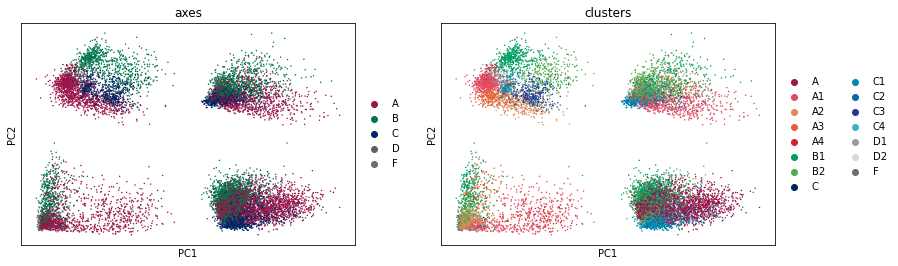

In [12]:
sc.pl.pca(adata_joined, color=['axes', 'clusters'])

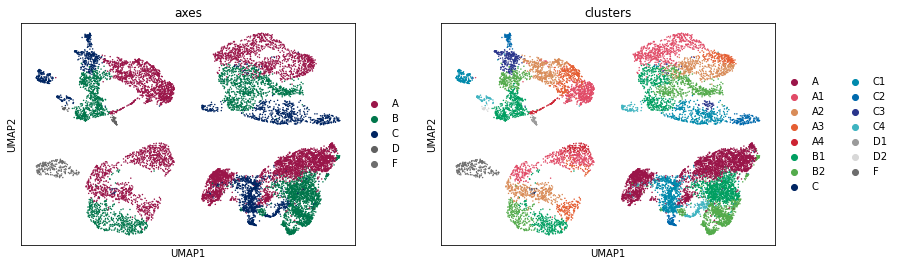

In [13]:
sc.pl.umap(adata_joined, color=['axes', 'clusters'])

In [14]:
adata_joined.X = adata_joined.X.tocsc()

In [15]:
adata_joined.write_h5ad(zenodo_dir + '/joined_fb.h5ad')

In [ ]:
!cellxgene launch {zenodo_dir}/joined_fb.h5ad --disable-annotations

[cellxgene] Starting the CLI...
[cellxgene] Loading data from joined_fb.h5ad.
[cellxgene] Launching! Please go to http://localhost:5005 in your browser.
[cellxgene] Type CTRL-C at any time to exit.
